### Regression | Data exploration using boston housing dataset

**The Boston Housing Dataset:** is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
...
- (The target variable) MEDV - Median value of owner-occupied homes in thousand of dolares.

In [40]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import read_csv

In [41]:
boston = pd.read_csv('Boston.csv')
print(boston.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


**Creating features and target values**

We split our DataFrame: in the first line, que drop the target, and in the second we keep only the target.

In [42]:
X = boston.drop('medv', axis = 1).values
y = boston['medv'].values

As a first task, let's try to predict the price from a single feature: the average number of rooms in a block. To do this, we slice out the number of rooms column of the DataFrame `X`, which is the fifth column into the variable `X_rooms`.

In [43]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [44]:
# To turn them to NumPy arrays of the desire shape, we apply reshape method to keep the first dimension, 
# but add another dimension of size one to X
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

Now let's plot house value as functions of the number of rooms using matplot lib.

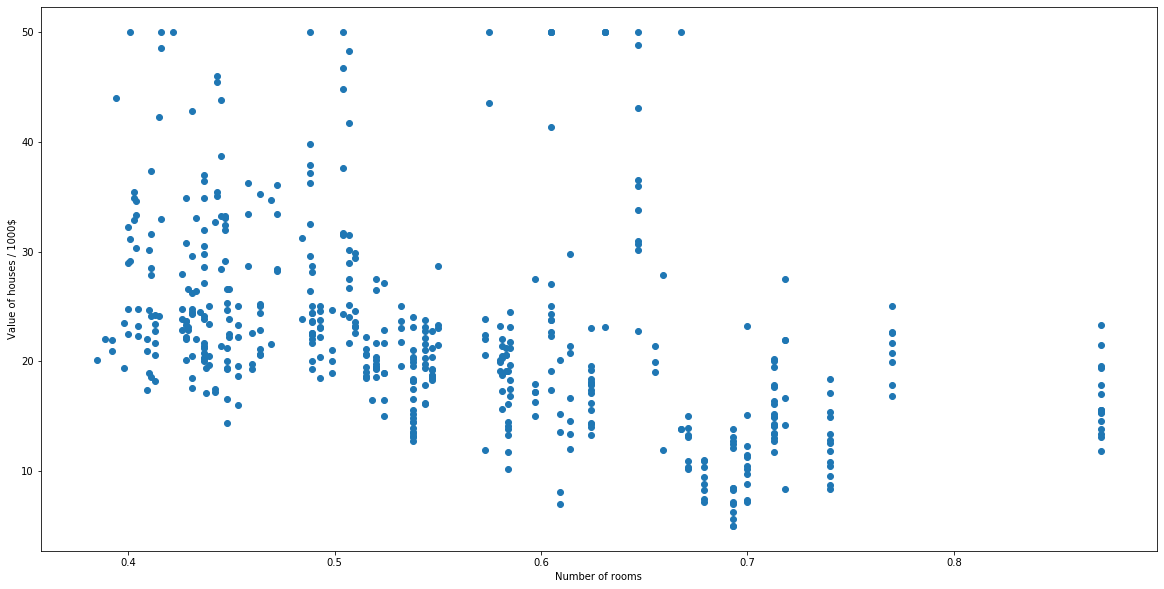

In [46]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of houses / 1000$')
plt.xlabel('Number of rooms')
# plt.rcParams["figure.figsize"] = (20,10)
plt.show()

# We can immediately see that, as one might expect, more rooms lead to higher prices. 

**Fitting a regression model**

In [51]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)

#We want to check out the regressions predictions over the range of the data 
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

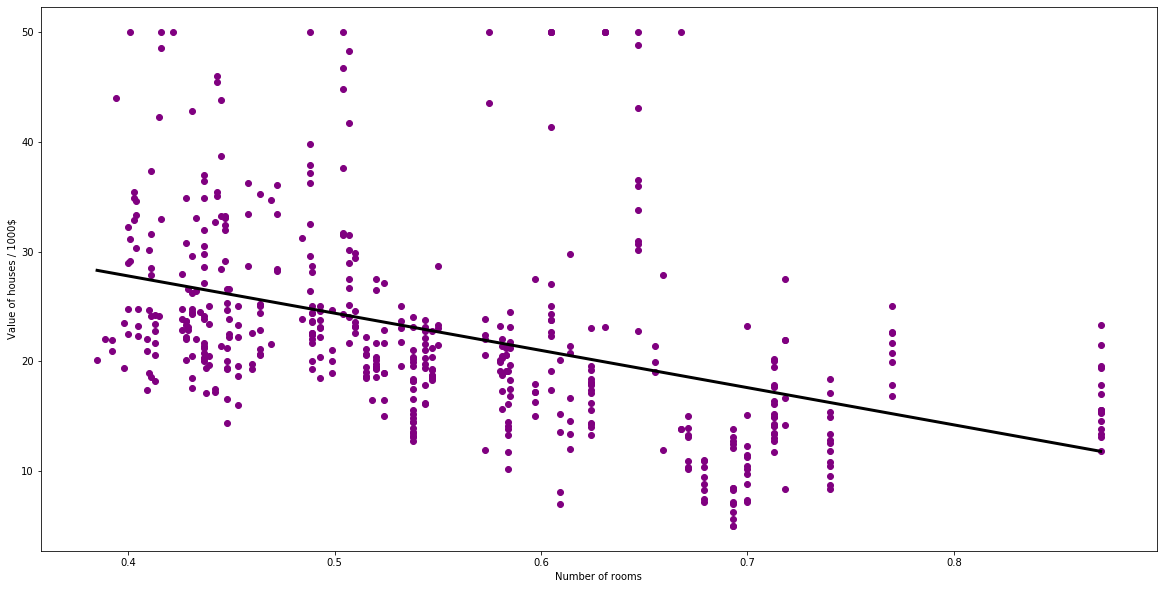

In [52]:
plt.scatter(X_rooms, y, color = 'purple')
plt.ylabel('Value of houses / 1000$')
plt.xlabel('Number of rooms')
plt.plot(prediction_space, reg.predict(prediction_space), color = 'black', linewidth = 3)
plt.show()